<a href="https://colab.research.google.com/github/jdelarosaquiros/creating-deep-learning-models/blob/main/Creating_and_Training_DL_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [49]:
# import all required libraries
import tensorflow as tf
from tensorflow import keras
#import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import random

In [50]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Computer Vision - CNN

The goal of in this section is to develop, train, and test Convolutional Neural Networks for the Computer Vision task of image classification.

## Loading and Preparing Data

(10 points + 10 extra credits)

To train this model, I used the CIFAR-100 dataset from the built-in datasets of Keras. The dataset consists of 60,000 32x32 color images, and each of them belong to one of 100 classes. Also, there are 600 images per class. There are 50000 training images (500 per class) and 10000 test images (100 per class). More information about the dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html), and in this [website](https://benchmarks.ai/cifar-100), there is a benchmark list of top performances using different techniques on this dataset. The objective is to classify the images into their respective class.



In [51]:
# The data from Keras will only have integer class labels, 
# and the 100 integer labels correspond to the following names:
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


In [52]:
# Loading training and testing the data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode="fine")

flatten_y_train = [y[0] for y in y_train]
print((flatten_y_train))
flatten_y_test = [y[0] for y in y_test]
print((flatten_y_test))

169001437/169001437 [==============================] - 2s 0us/step
[19, 29, 0, 11, 1, 86, 90, 28, 23, 31, 39, 96, 82, 17, 71, 39, 8, 97, 80, 71, 74, 59, 70, 87, 59, 84, 64, 52, 42, 64, 8, 17, 47, 65, 21, 22, 81, 11, 24, 84, 78, 45, 49, 97, 56, 76, 11, 90, 89, 78, 73, 14, 87, 9, 71, 6, 47, 20, 98, 47, 36, 55, 72, 43, 51, 35, 83, 33, 27, 53, 92, 50, 15, 89, 36, 18, 89, 46, 33, 42, 39, 64, 75, 38, 23, 42, 66, 77, 49, 18, 46, 15, 35, 69, 95, 83, 75, 99, 73, 93, 55, 39, 4, 97, 61, 93, 51, 69, 56, 84, 59, 64, 94, 4, 11, 33, 68, 38, 20, 33, 34, 32, 46, 53, 88, 67, 70, 64, 53, 64, 8, 96, 87, 30, 20, 30, 66, 19, 76, 87, 52, 62, 35, 63, 40, 4, 99, 63, 74, 53, 26, 95, 48, 27, 33, 29, 39, 79, 32, 46, 64, 28, 85, 32, 82, 78, 39, 54, 28, 66, 65, 72, 21, 64, 62, 72, 0, 44, 7, 12, 19, 11, 31, 61, 79, 45, 81, 79, 98, 43, 46, 67, 80, 68, 74, 48, 81, 94, 86, 69, 39, 73, 2, 46, 49, 63, 43, 14, 49, 68, 65, 41, 37, 45, 36, 21, 77, 37, 39, 8, 9, 62, 86, 39, 19, 54, 39, 28, 11, 89, 90, 90, 79, 66, 81, 21, 79,

In [53]:
# Shape of data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


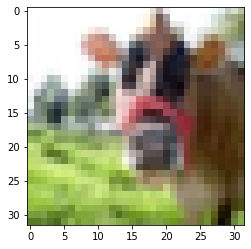

In [54]:
# Example of image
plt.imshow(x_train[0])

In [55]:
# Matching labels with images
label_image_examples = {}
for index in range(len(fine_labels)):
  label_image_examples[index] = flatten_y_train.index(index)

print(label_image_examples)

{0: 2, 1: 4, 2: 202, 3: 342, 4: 102, 5: 285, 6: 55, 7: 178, 8: 16, 9: 53, 10: 244, 11: 3, 12: 179, 13: 240, 14: 51, 15: 72, 16: 573, 17: 13, 18: 75, 19: 0, 20: 57, 21: 34, 22: 35, 23: 8, 24: 38, 25: 241, 26: 150, 27: 68, 28: 7, 29: 1, 30: 133, 31: 9, 32: 121, 33: 67, 34: 120, 35: 65, 36: 60, 37: 212, 38: 83, 39: 10, 40: 144, 41: 211, 42: 28, 43: 63, 44: 177, 45: 41, 46: 77, 47: 32, 48: 152, 49: 42, 50: 71, 51: 64, 52: 27, 53: 69, 54: 167, 55: 61, 56: 44, 57: 270, 58: 378, 59: 21, 60: 300, 61: 104, 62: 141, 63: 143, 64: 26, 65: 33, 66: 86, 67: 125, 68: 116, 69: 93, 70: 22, 71: 14, 72: 62, 73: 50, 74: 20, 75: 82, 76: 45, 77: 87, 78: 40, 79: 157, 80: 18, 81: 36, 82: 12, 83: 66, 84: 25, 85: 162, 86: 5, 87: 23, 88: 124, 89: 48, 90: 6, 91: 313, 92: 70, 93: 99, 94: 112, 95: 94, 96: 11, 97: 17, 98: 58, 99: 97}


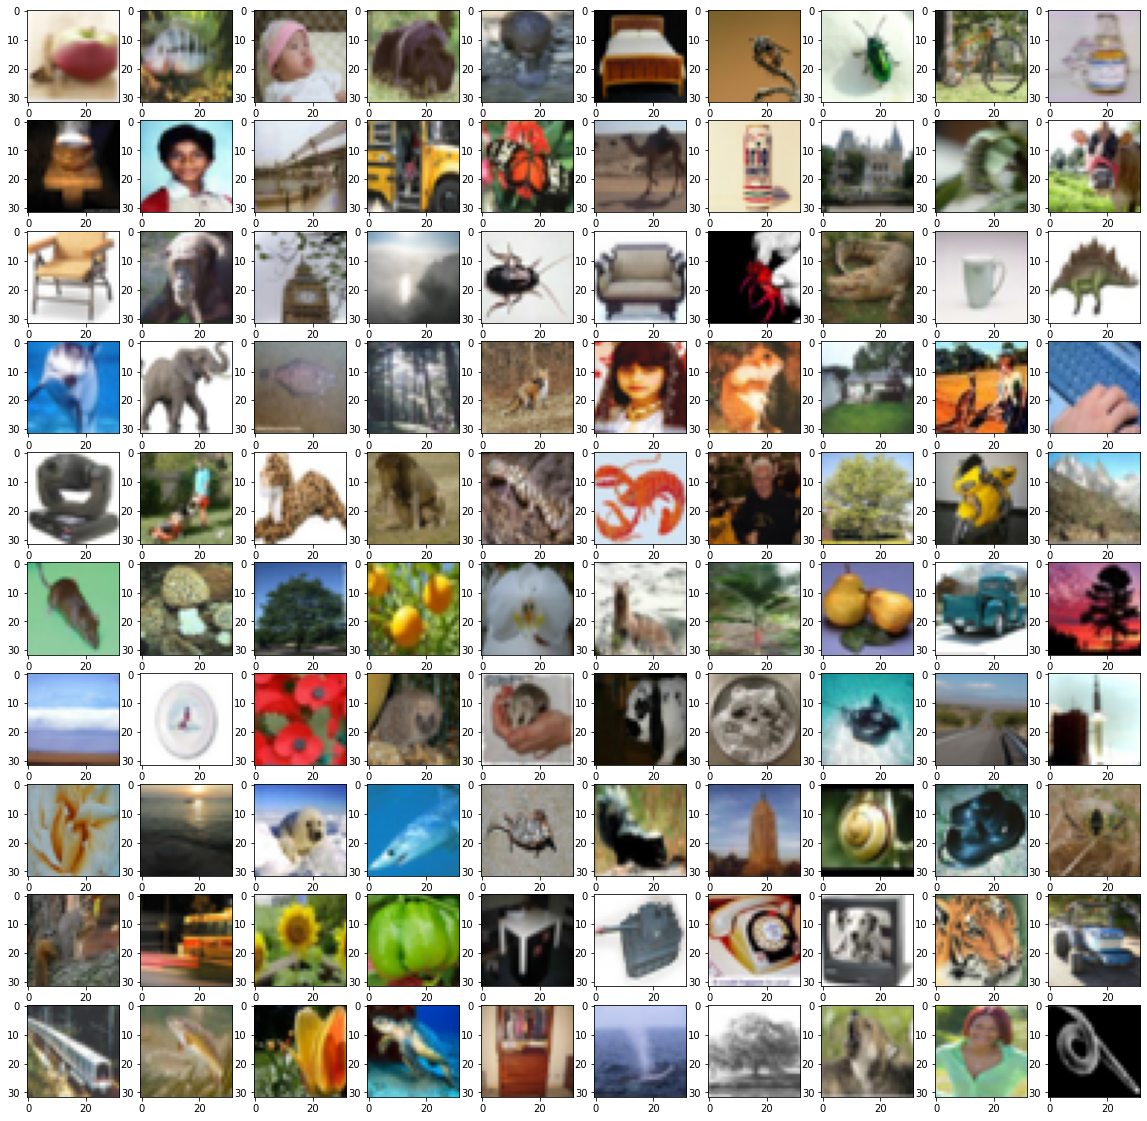

In [56]:
# Showing example image for each of the 100 classes
columns = 10
rows = 10

fig = plt.figure(figsize=(20, 20))
position = 1

for image_number in label_image_examples.values():
  fig.add_subplot(rows, columns, position)
  plt.imshow(x_train[image_number])
  position += 1


In [ ]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

## Creating Model

Creating a deep learning model for classifying the images into their respective classes without overfitting/overtraining the model.

In [ ]:
# Using Convolutional Neural Network (CNN) layers to extract features and edges from images
# followed by Dense layers to classify the image into one of the categories. 

model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=[x_train.shape[1], x_train.shape[2], 3]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.1),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(units=512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=100, activation='relu'),
    keras.layers.Dense(units=len(np.unique(y_train)), activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 8, 8, 128)        

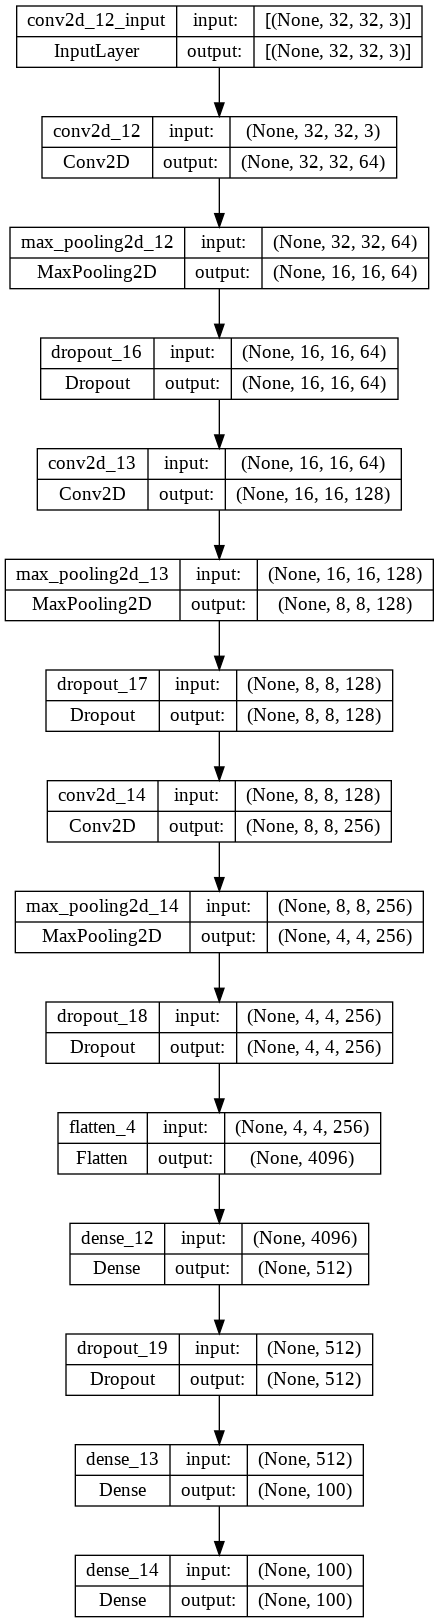

In [ ]:
# Printing the model summary
print(model.summary())
keras.utils.plot_model(model, show_shapes=True)

## Training

Training the model using the CIFAR-100 training data


In [ ]:
# Training the model by using 80% of data for training and 20% for validation
report = model.fit(x_train, y_train, batch_size=50, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
800/800 [==============================] - 4s 5ms/step - loss: 4.2318 - accuracy: 0.0457 - val_loss: 3.8399 - val_accuracy: 0.0989
Epoch 2/50
800/800 [==============================] - 3s 4ms/step - loss: 3.6926 - accuracy: 0.1243 - val_loss: 3.4295 - val_accuracy: 0.1694
Epoch 3/50
800/800 [==============================] - 3s 4ms/step - loss: 3.4023 - accuracy: 0.1768 - val_loss: 3.1415 - val_accuracy: 0.2298
Epoch 4/50
800/800 [==============================] - 4s 4ms/step - loss: 3.2019 - accuracy: 0.2140 - val_loss: 3.0381 - val_accuracy: 0.2577
Epoch 5/50
800/800 [==============================] - 3s 4ms/step - loss: 3.0487 - accuracy: 0.2416 - val_loss: 2.8675 - val_accuracy: 0.2874
Epoch 6/50
800/800 [==============================] - 3s 4ms/step - loss: 2.9378 - accuracy: 0.2668 - val_loss: 2.7343 - val_accuracy: 0.3103
Epoch 7/50
800/800 [==============================] - 3s 4ms/step - loss: 2.8325 - accuracy: 0.2833 - val_loss: 2.6980 - val_accuracy: 0.3205
Epoch 

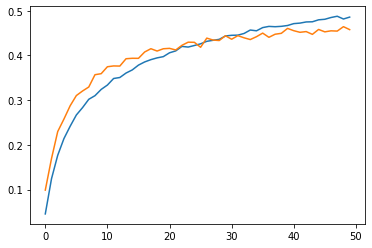

In [ ]:
# Ploting the training & validation accuracy
# - The blue line is the accuracy of the training
# - The orange line is the accuracy of the validation

plt.plot(report.history['accuracy'])
plt.plot(report.history['val_accuracy'])

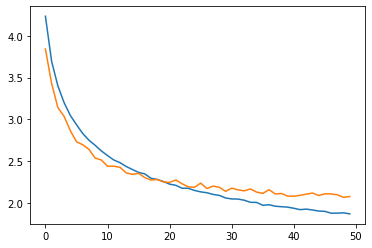

In [ ]:
# Ploting the training & validation error loss
# - The blue line is the error loss of the training
# - The orange line is the error loss of the validation

plt.plot(report.history['loss'])
plt.plot(report.history['val_loss'])

## Testing and Evaluating

Evaluating the trained model on the CIFAR-100 testing dataset.

In [ ]:
# Evaluating the trained model
model.evaluate(x_test, np.array(y_test))

313/313 [==============================] - 1s 3ms/step - loss: 2.0579 - accuracy: 0.4630


[2.05790638923645, 0.46299999952316284]

# Natural Language Processing - RNN

The goal of in this section is to develop, train, and test Recurrent Neural Networks for the Natural Language Processing task of Sentiment Analysis / Text Classification. 


## Loading and Preparing Data

In this part, you used Reuters Newswire Classification Dataset from Keras. The dataset consists of newswires from Reuters, and they can fall into 46 different topics. More information about the dataset can be found [here](https://keras.io/api/datasets/reuters/). The Keras dataset is a cleaned and organized version of the original dataset and consists of 11,228 newswires. The objective is to classify a newswire into one of the 46 output catergories.

In [ ]:
# The data from Keras will only have integer topic labels, 
# and the 46 integer labels correspond to the following names:
reuters_topics = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
 'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
 'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
 'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
 'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

In [ ]:
# Loading the Reuters dataset
# Selecting a vocabulary size of 20,000 words
# Note: The words are already in their integer representations

(x_train, y_train), (x_test, y_test) = keras.datasets.reuters.load_data(num_words=20000)
print(x_train.shape)
print(y_train.shape)
print(y_train[0])
print(x_train[0])
len_list = [len(x) for x in x_train]
len_list.sort()
print(len_list)
max_length = len_list[int(len(len_list) * 0.55)]
print(max_length)
print(y_train)

2110848/2110848 [==============================] - 0s 0us/step
(8982,)
(8982,)
3
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[13, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,

In [ ]:
# Preparing the data to be used for the next steps
# - Making each newswire by assigning a max number of words
# - Padding with 0 the newswires that have less words than the maximum

x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_length, value=0, padding='post')
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_length, value=0, padding='post')

## Creating Model

Creating a natural language processing for classifying the images into their respective classes without overfitting/overtraining the model.

In [ ]:
# Using a combination of Long Short Term Memory (Recurrent Neural Network) and Dense layers
model = keras.Sequential([
    keras.layers.Embedding(input_dim=20000, output_dim=64),
    keras.layers.LSTM(units=64, return_sequences=True),
    keras.layers.Dropout(0.1), 
    keras.layers.LSTM(units=64, return_sequences=True),
    keras.layers.Dropout(0.2), 
    keras.layers.LSTM(units=64),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=118, activation='relu'),
    keras.layers.Dropout(0.4), 
    keras.layers.Dense(units=246, activation='relu'),    
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(units=len(np.unique(y_train)), activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 64)          1280000   
                                                                 
 lstm_24 (LSTM)              (None, None, 64)          33024     
                                                                 
 dropout_40 (Dropout)        (None, None, 64)          0         
                                                                 
 lstm_25 (LSTM)              (None, None, 64)          33024     
                                                                 
 dropout_41 (Dropout)        (None, None, 64)          0         
                                                                 
 lstm_26 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_42 (Dropout)        (None, 64)               

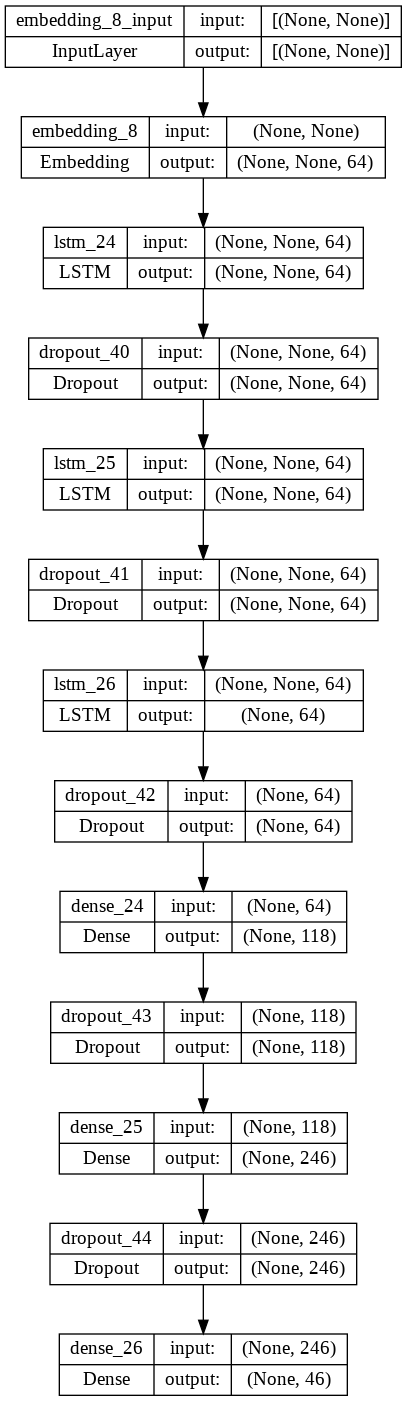

In [ ]:
# Printing the model summary
print(model.summary())
keras.utils.plot_model(model, show_shapes=True)

## Training

Training the model using the Reuters data


In [ ]:
# Training the model by using 80% of data for training and 20% for validation
report = model.fit(x_train, y_train, batch_size=56, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
129/129 [==============================] - 8s 26ms/step - loss: 2.4770 - accuracy: 0.3308 - val_loss: 2.0379 - val_accuracy: 0.3472
Epoch 2/20
129/129 [==============================] - 2s 18ms/step - loss: 2.0337 - accuracy: 0.3889 - val_loss: 2.0447 - val_accuracy: 0.2510
Epoch 3/20
129/129 [==============================] - 2s 18ms/step - loss: 1.8758 - accuracy: 0.4913 - val_loss: 1.8026 - val_accuracy: 0.5303
Epoch 4/20
129/129 [==============================] - 2s 18ms/step - loss: 1.9757 - accuracy: 0.4536 - val_loss: 1.7679 - val_accuracy: 0.5198
Epoch 5/20
129/129 [==============================] - 2s 18ms/step - loss: 1.7431 - accuracy: 0.5375 - val_loss: 1.7730 - val_accuracy: 0.5253
Epoch 6/20
129/129 [==============================] - 2s 18ms/step - loss: 1.6466 - accuracy: 0.5783 - val_loss: 1.7116 - val_accuracy: 0.5604
Epoch 7/20
129/129 [==============================] - 2s 18ms/step - loss: 1.5954 - accuracy: 0.5962 - val_loss: 1.7054 - val_accuracy: 0.5671

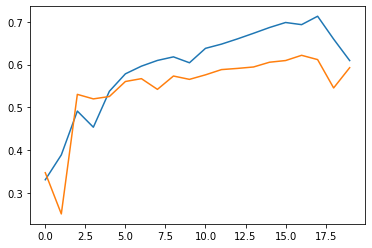

In [ ]:
# Ploting the training & validation accuracy
# - The blue line is the accuracy of the training
# - The orange line is the accuracy of the validation

plt.plot(report.history['accuracy'])
plt.plot(report.history['val_accuracy'])

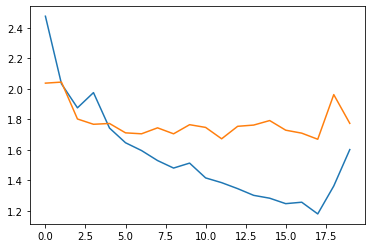

In [ ]:
# Ploting the training & validation error loss
# - The blue line is the error loss of the training
# - The orange line is the error loss of the validation

plt.plot(report.history['loss'])
plt.plot(report.history['val_loss'])

## Testing/Evaluation

Evaluating the trained DL model on the Reuters test dataset.

In [ ]:
# Evaluating the trained model
model.evaluate(x_test, np.array(y_test))

71/71 [==============================] - 1s 9ms/step - loss: 1.8461 - accuracy: 0.5739


[1.846099615097046, 0.5739091634750366]